In [1]:
#pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Kununu Data

**Content of the File:**
Analysing kununu values of all completed responses of current employeesat Hugo Boss or any of its affiliates.

**Description of the data:**
The dataset contains user-generated reviews related to HUGO BOSS from the website Kununu, which is a platform for employer reviews and workplace insights. Each row is a single user review containing the responses and characteristics of the user.



### Load and Preprocess the Data

In [3]:
data = pd.read_csv('Kununu_Fashion_and_Retail.csv', index_col=0)
data.head()

,user_uuid,company_name,profile_uuid,profile_name,profile_city,profile_industry_name_en,company_uuid,company_city,company_industry_name,review_created_at,...,meals,pension_plan,clothes,daycare,reachability,coaching,feedback_suggestion_text,feedback_positive_text,feedback_negative_text,profile_url
0,f3521258-c82f-45a3-816b-644c9b4e56db,Schüco International KG,3b42dda1-4273-4170-ac6e-1d0de2f61986,Schüco International KG,Bielefeld,Construction & Architecture,7a996ddb-0ad7-4b6c-953a-d1f782a1b451,Weißenfels,Retail & Consumer Goods,2023-11-15 15:46:00 UTC,...,True,True,NaN,NaN,NaN,True,NaN,NaN,NaN,https://www.kununu.com/de/schueco-international
1,37599113-66f5-496f-842c-708991c503ef,iSi Automotive Austria GmbH,08a13af9-32f2-4200-a0f3-c6e086f3bbb4,iSi Automotive Austria GmbH,Wien,Manufacturing,946e5a83-a152-413e-8d94-ff42147feb34,Vienna,Manufacturing,2018-04-12 08:24:35 UTC,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,https://www.kununu.com/at/isi-automotive
2,62fa8e9f-d77c-4fe3-abe2-7732ae73de67,Heinrich Huhn GmbH & Co. KG,df80615f-4272-458a-9dfc-6409feec335a,Heinrich Huhn GmbH & Co. KG,Drolshagen,Manufacturing,9bf9ef63-e14c-4aec-9f59-9e822bc4074b,Drolshagen,Manufacturing,2019-11-07 10:23:12 UTC,...,NaN,NaN,NaN,NaN,True,NaN,Er sollte endlich mal mit dem Gejammer aufhöre...,Keine!,"Wochenendarbeit, immer wieder wechselnde Schic...",https://www.kununu.com/de/heinrich-huhn
3,3755ac75-c33f-4a12-a7cf-c9ba04577f24,Komatsu Mining Germany GmbH,131ecf5e-1435-4c21-97bb-c6e1f4bdba9e,"Komatsu Mining Germany GmbH, Düsseldorf",Leverkusen,Mechanical & Industrial Engineering,9448ed39-9ffe-4fd7-b783-c773314bb37f,Düsseldorf,Manufacturing,2020-04-20 14:25:08 UTC,...,NaN,NaN,NaN,NaN,NaN,NaN,Wen sie überhaupt was machen würden .da reicht...,Für nix machen ja nic,Zur Zeit alles falsch trotz vieler alten Kolle...,https://www.kununu.com/de/komatsu-mining-germa...
4,1e66365d-51ff-4735-b428-4b092f31cf83,Gabler Werbeagentur GmbH,c7e107e6-10f0-47b3-9092-3d740a92b011,Gabler Werbeagentur GmbH,Stuttgart,"Marketing, Advertising & PR",4e057fb8-ef91-4204-bc84-a88e4fb18d4e,Stuttgart,"Marketing, Advertising & PR",2020-10-02 09:52:52 UTC,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,https://www.kununu.com/de/gabler-werbeagentur1


In [4]:
print(data.shape)
print(data['company_name'].nunique())

(365406, 69)
52929


In [5]:
#Taking only employees of Hugo boss and affiliated companies

#check if company_name contains a string
df = data[data['company_name'].str.contains('HUGO BOSS')].reset_index(drop=True)

#only taking rows where company_name is HUGO BOSS 
df['company_name'].unique()


array(['HUGO BOSS AG', 'HUGO BOSS', 'HUGO BOSS Ticino SA',
       'HUGO BOSS International Markets AG'], dtype=object)

In [6]:
df.shape

(361, 69)

In [7]:
#creating a subset for existing employees at the time of the review
df = df[df['employment_status'] == 'current'].reset_index(drop=True)

In [8]:
df.shape

(262, 69)

We now have 262 reviews that can be used for our analysis

In [9]:
df.columns

Index(['user_uuid', 'company_name', 'profile_uuid', 'profile_name',
       'profile_city', 'profile_industry_name_en', 'company_uuid',
       'company_city', 'company_industry_name', 'review_created_at',
       'review_last_updated_at', 'review_score', 'employer_atmosphere_score',
       'employer_communication_score', 'employer_teamwork_score',
       'employer_work_life_score', 'employer_leadership_score',
       'employer_tasks_score', 'employer_equality_score',
       'employer_old_colleagues_score', 'employer_work_conditions_score',
       'employer_environment_score', 'employer_salary_score',
       'employer_image_score', 'employer_career_score',
       'employer_atmosphere_score_text', 'employer_communication_score_text',
       'employer_teamwork_score_text', 'employer_work_life_score_text',
       'employer_leadership_score_text', 'employer_tasks_score_text',
       'employer_equality_score_text', 'employer_old_colleagues_score_text',
       'employer_work_conditions_score_te

In [10]:
#drop columns that are not needed
df = df.drop(columns=['user_uuid', 'profile_uuid','company_uuid', 'profile_url', 'profile_industry_name_en', 'company_city','company_industry_name', 'profile_city', 'profile_name', 'employment_status'])
df

,company_name,review_created_at,review_last_updated_at,review_score,employer_atmosphere_score,employer_communication_score,employer_teamwork_score,employer_work_life_score,employer_leadership_score,employer_tasks_score,...,car,meals,pension_plan,clothes,daycare,reachability,coaching,feedback_suggestion_text,feedback_positive_text,feedback_negative_text
0,HUGO BOSS AG,2019-04-25 07:57:50 UTC,2019-04-25 08:02:18 UTC,4.5385,5.0,5.0,4.0,5.0,5.0,4.0,...,True,NaN,True,NaN,True,True,True,NaN,"Sehr angenehmes Arbeitsklima, sehr gute Firmen...",NaN
1,HUGO BOSS AG,2019-05-15 11:21:31 UTC,2019-05-15 11:21:31 UTC,4.0769,4.0,3.0,4.0,4.0,5.0,4.0,...,NaN,True,True,NaN,NaN,NaN,True,Prozesse unter den einzelnen Brand Gender Line...,New Work Methodik wird eingeführt,NaN
2,HUGO BOSS AG,2023-05-02 12:10:49 UTC,2023-05-02 12:10:49 UTC,4.8462,5.0,4.0,5.0,5.0,5.0,5.0,...,True,True,True,NaN,True,NaN,True,Bessere ÖPNV Anbindung gerade im Hinblick auf ...,NaN,NaN
3,HUGO BOSS AG,2019-04-25 08:13:39 UTC,2019-04-25 08:13:39 UTC,4.3077,4.0,4.0,4.0,4.0,5.0,4.0,...,NaN,NaN,True,NaN,NaN,NaN,True,NaN,NaN,NaN
4,HUGO BOSS AG,2023-04-17 12:58:50 UTC,2023-04-17 12:58:50 UTC,4.6923,5.0,5.0,5.0,4.0,4.0,5.0,...,True,NaN,True,NaN,True,NaN,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,HUGO BOSS AG,2023-02-23 19:55:28 UTC,2023-02-23 19:55:28 UTC,4.3077,4.0,4.0,4.0,4.0,4.0,4.0,...,NaN,True,True,NaN,True,NaN,NaN,NaN,NaN,NaN
258,HUGO BOSS,2018-04-18 15:40:42 UTC,2018-04-18 15:40:42 UTC,4.4615,4.0,3.0,3.0,5.0,5.0,5.0,...,NaN,NaN,True,NaN,True,NaN,True,NaN,NaN,NaN
259,HUGO BOSS AG,2019-04-25 09:12:46 UTC,2019-04-25 09:12:46 UTC,5.0000,5.0,5.0,5.0,5.0,5.0,5.0,...,NaN,NaN,True,NaN,NaN,NaN,True,NaN,NaN,NaN
260,HUGO BOSS AG,2022-04-28 06:52:21 UTC,2022-04-28 06:52:21 UTC,4.8462,5.0,5.0,5.0,5.0,5.0,5.0,...,NaN,True,True,NaN,True,NaN,True,NaN,NaN,NaN


In [11]:
#replace NaN in certain columns with unkwown
df[['employment_department', 'employment_position_type', 'review_user_gender']] = df[['employment_department', 'employment_position_type', 'review_user_gender']].fillna('Unknown')


In [12]:
#save the data
df.to_excel('Hugo_Boss_Kununu.xlsx')

In [13]:
#any columns that are all NaN are dropped
df = df.dropna(axis=1, how='all')
df.shape

(262, 56)

In [14]:
df.dtypes

company_name                            object
review_created_at                       object
review_last_updated_at                  object
review_score                           float64
employer_atmosphere_score              float64
employer_communication_score           float64
employer_teamwork_score                float64
employer_work_life_score               float64
employer_leadership_score              float64
employer_tasks_score                   float64
employer_equality_score                float64
employer_old_colleagues_score          float64
employer_work_conditions_score         float64
employer_environment_score             float64
employer_salary_score                  float64
employer_image_score                   float64
employer_career_score                  float64
employer_atmosphere_score_text          object
employer_communication_score_text       object
employer_teamwork_score_text            object
employer_work_life_score_text           object
employer_lead

In [15]:
def convert_column_to_bool(col):
    """
    converting yes/no columns to boolean
    """
    if col.isin([True, False, 'True', 'False', np.nan]).all():  # Check for only valid boolean-like values
        return col.replace({'True': True, 'False': False}).astype('boolean')  # Correct conversion and keep NaNs as pd.NA
    return col


df = df.apply(convert_column_to_bool)


/var/folders/h_/t7j5x_l10kg4zbr6vvxlqx5h0000gn/T/ipykernel_25405/3628980635.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return col.replace({'True': True, 'False': False}).astype('boolean')  # Correct conversion and keep NaNs as pd.NA


In [16]:
df.dtypes

company_name                            object
review_created_at                       object
review_last_updated_at                  object
review_score                           float64
employer_atmosphere_score              float64
employer_communication_score           float64
employer_teamwork_score                float64
employer_work_life_score               float64
employer_leadership_score              float64
employer_tasks_score                   float64
employer_equality_score                float64
employer_old_colleagues_score          float64
employer_work_conditions_score         float64
employer_environment_score             float64
employer_salary_score                  float64
employer_image_score                   float64
employer_career_score                  float64
employer_atmosphere_score_text          object
employer_communication_score_text       object
employer_teamwork_score_text            object
employer_work_life_score_text           object
employer_lead

In [17]:
df.head()

,company_name,review_created_at,review_last_updated_at,review_score,employer_atmosphere_score,employer_communication_score,employer_teamwork_score,employer_work_life_score,employer_leadership_score,employer_tasks_score,...,dogs,car,meals,pension_plan,daycare,reachability,coaching,feedback_suggestion_text,feedback_positive_text,feedback_negative_text
0,HUGO BOSS AG,2019-04-25 07:57:50 UTC,2019-04-25 08:02:18 UTC,4.5385,5.0,5.0,4.0,5.0,5.0,4.0,...,<NA>,True,<NA>,True,True,True,True,NaN,"Sehr angenehmes Arbeitsklima, sehr gute Firmen...",NaN
1,HUGO BOSS AG,2019-05-15 11:21:31 UTC,2019-05-15 11:21:31 UTC,4.0769,4.0,3.0,4.0,4.0,5.0,4.0,...,<NA>,<NA>,True,True,<NA>,<NA>,True,Prozesse unter den einzelnen Brand Gender Line...,New Work Methodik wird eingeführt,NaN
2,HUGO BOSS AG,2023-05-02 12:10:49 UTC,2023-05-02 12:10:49 UTC,4.8462,5.0,4.0,5.0,5.0,5.0,5.0,...,True,True,True,True,True,<NA>,True,Bessere ÖPNV Anbindung gerade im Hinblick auf ...,NaN,NaN
3,HUGO BOSS AG,2019-04-25 08:13:39 UTC,2019-04-25 08:13:39 UTC,4.3077,4.0,4.0,4.0,4.0,5.0,4.0,...,<NA>,<NA>,<NA>,True,<NA>,<NA>,True,NaN,NaN,NaN
4,HUGO BOSS AG,2023-04-17 12:58:50 UTC,2023-04-17 12:58:50 UTC,4.6923,5.0,5.0,5.0,4.0,4.0,5.0,...,<NA>,True,<NA>,True,True,<NA>,True,NaN,NaN,NaN


### Scores (1 to 5 stars)

In [18]:
#see the columns that are float
df1 = df.select_dtypes(include=['float64'])

In [19]:
#split the data into two dataframes to get the mean values of 
df1 = df1.mean()

df1

review_score                      4.090008
employer_atmosphere_score         4.237548
employer_communication_score      3.742308
employer_teamwork_score           4.167939
employer_work_life_score          4.226054
employer_leadership_score         3.820611
employer_tasks_score              4.276923
employer_equality_score           4.078125
employer_old_colleagues_score     4.260870
employer_work_conditions_score    4.384615
employer_environment_score        4.096899
employer_salary_score             3.704981
employer_image_score              4.396947
employer_career_score             3.845560
dtype: float64

In [20]:
#calculate distance from the mean
df1_2 = df1 - df1.mean()
df1_2

review_score                     -0.004949
employer_atmosphere_score         0.142592
employer_communication_score     -0.352648
employer_teamwork_score           0.072983
employer_work_life_score          0.131097
employer_leadership_score        -0.274345
employer_tasks_score              0.181967
employer_equality_score          -0.016831
employer_old_colleagues_score     0.165913
employer_work_conditions_score    0.289659
employer_environment_score        0.001943
employer_salary_score            -0.389975
employer_image_score              0.301990
employer_career_score            -0.249396
dtype: float64

In [21]:
#drop the review score row
df1_2 = df1_2.drop('review_score')
df1_2

employer_atmosphere_score         0.142592
employer_communication_score     -0.352648
employer_teamwork_score           0.072983
employer_work_life_score          0.131097
employer_leadership_score        -0.274345
employer_tasks_score              0.181967
employer_equality_score          -0.016831
employer_old_colleagues_score     0.165913
employer_work_conditions_score    0.289659
employer_environment_score        0.001943
employer_salary_score            -0.389975
employer_image_score              0.301990
employer_career_score            -0.249396
dtype: float64

In [22]:
df1_2 = pd.DataFrame(df1_2)
df1_2.columns = ['Distance from Mean']
df1_2

,Distance from Mean
employer_atmosphere_score,0.142592
employer_communication_score,-0.352648
employer_teamwork_score,0.072983
employer_work_life_score,0.131097
employer_leadership_score,-0.274345
employer_tasks_score,0.181967
employer_equality_score,-0.016831
employer_old_colleagues_score,0.165913
employer_work_conditions_score,0.289659
employer_environment_score,0.001943


In [23]:
fig = px.bar(df1_2, 
             x=df1_2.index, 
             y='Distance from Mean', 
             color='Distance from Mean', 
             color_continuous_scale=px.colors.sequential.Brwnyl_r, 
             range_color=[-0.4, 0.4],  
             labels={'Distance from Mean': 'Difference from Mean'},
             title='Strengths and Weaknesses Relative to Average Score')


fig.update_layout(
    xaxis_title="Focus Areas", 
    yaxis_title="Difference from Mean",
    xaxis_tickangle=-45,  
    height=600,          
    width=1000,          
    font=dict(size=14),
    coloraxis_colorbar=dict(title="Difference from Mean"), 
    plot_bgcolor='white',  
    paper_bgcolor='white'  

)

fig.show()


In [24]:
#converting the above values to percentage using the formula: 
# (x - min) / (max - min) * 100
#we know min_score to be 1 and max_score to be 5
min_score = 1
max_score = 5

df1 = df1.apply(lambda x: ((x - min_score) / (max_score - min_score)) * 100)
df1

review_score                      77.250191
employer_atmosphere_score         80.938697
employer_communication_score      68.557692
employer_teamwork_score           79.198473
employer_work_life_score          80.651341
employer_leadership_score         70.515267
employer_tasks_score              81.923077
employer_equality_score           76.953125
employer_old_colleagues_score     81.521739
employer_work_conditions_score    84.615385
employer_environment_score        77.422481
employer_salary_score             67.624521
employer_image_score              84.923664
employer_career_score             71.138996
dtype: float64

In [25]:
fig = px.histogram(df, x='review_score', nbins=20, title='Distribution of Review Scores',
                   labels={'review_score': 'Review Score'},
                   color_discrete_sequence=px.colors.sequential.Brwnyl)

fig.update_layout(
    xaxis_title='Review Score',
    yaxis_title='Count',
    template='plotly_white'
)

fig.show()


In [26]:
# Select columns related to employer scores
score_columns = ['employer_atmosphere_score', 'employer_communication_score', 
                 'employer_teamwork_score', 'employer_work_life_score']

# Melt the dataframe to have a long-form dataset suitable for Plotly Express
df_melted = df[score_columns].melt(var_name='Score Type', value_name='Score')


fig = px.box(df_melted, x='Score Type', y='Score', color='Score Type',
             title='Distribution of Employer Scores',
             color_discrete_sequence=px.colors.sequential.Brwnyl_r)


fig.update_layout(
    xaxis_title='Score Type',
    yaxis_title='Score',
    template='plotly_white',
    showlegend=False  
)

fig.show()

### Boolean Scores (True/ False)

In [27]:
#take the remaining columns from df and convert them to another df
df2 = df.select_dtypes(include=['bool'])
df2

,employment_is_recommended,internet,stock_options,health_program,flex_working_hours,parking,accessibility,mobile_phone,discounts,home_office,doctor,events,cantine,dogs,car,meals,pension_plan,daycare,reachability,coaching
0,True,True,True,True,True,True,True,True,True,True,True,True,True,<NA>,True,<NA>,True,True,True,True
1,True,<NA>,True,True,<NA>,True,True,<NA>,True,True,True,True,True,<NA>,<NA>,True,True,<NA>,<NA>,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,<NA>,True
3,True,True,True,True,True,<NA>,True,<NA>,True,True,True,True,True,<NA>,<NA>,<NA>,True,<NA>,<NA>,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,<NA>,True,<NA>,True,True,<NA>,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,True,True,True,True,True,True,True,True,True,True,True,True,True,<NA>,<NA>,True,True,True,<NA>,<NA>
258,True,<NA>,True,True,True,True,<NA>,<NA>,True,True,True,True,True,<NA>,<NA>,<NA>,True,True,<NA>,True
259,True,True,True,True,True,True,<NA>,True,True,True,True,True,True,<NA>,<NA>,<NA>,True,<NA>,<NA>,True
260,True,True,True,True,True,True,True,True,True,True,True,True,True,<NA>,<NA>,True,True,True,<NA>,True


In [28]:
#count the number of True and False values in each column
df2 = df2.apply(pd.value_counts)
#df2 = df2.sum()
df2

/var/folders/h_/t7j5x_l10kg4zbr6vvxlqx5h0000gn/T/ipykernel_25405/3780909364.py:2: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.

/var/folders/h_/t7j5x_l10kg4zbr6vvxlqx5h0000gn/T/ipykernel_25405/3780909364.py:2: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.

/var/folders/h_/t7j5x_l10kg4zbr6vvxlqx5h0000gn/T/ipykernel_25405/3780909364.py:2: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.

/var/folders/h_/t7j5x_l10kg4zbr6vvxlqx5h0000gn/T/ipykernel_25405/3780909364.py:2: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.

/var/folders/h_/t7j5x_l10kg4zbr6vvxlqx5h0000gn/T/ipykernel_25405/3780909364.py:2: FutureWarning:

pandas.value_counts is deprecated 

,employment_is_recommended,internet,stock_options,health_program,flex_working_hours,parking,accessibility,mobile_phone,discounts,home_office,doctor,events,cantine,dogs,car,meals,pension_plan,daycare,reachability,coaching
False,41,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
True,221,146,177,205,214,190,103,148,235,213,231,210,225,4,59,110,224,118,63,143


In [29]:
#divide everything by 262 to get the percentage
df2 = df2 / 262 * 100
df2 = df2.T

In [30]:
df2

,False,True
employment_is_recommended,15.648855,84.351145
internet,<NA>,55.725191
stock_options,<NA>,67.557252
health_program,<NA>,78.244275
flex_working_hours,<NA>,81.679389
parking,<NA>,72.519084
accessibility,<NA>,39.312977
mobile_phone,<NA>,56.48855
discounts,<NA>,89.694656
home_office,<NA>,81.29771


In [31]:
#save the data
df2.to_excel('Hugo_Boss_Percentage.xlsx')


### Text Answers, Sentiment Analysis

In [32]:
#text df
df3 = df.select_dtypes(include=['object'])
df3.to_csv('text.csv')

In [33]:
df3

,company_name,review_created_at,review_last_updated_at,employer_atmosphere_score_text,employer_communication_score_text,employer_teamwork_score_text,employer_work_life_score_text,employer_leadership_score_text,employer_tasks_score_text,employer_equality_score_text,...,employer_environment_score_text,employer_salary_score_text,employer_image_score_text,employer_career_score_text,review_user_gender,employment_position_type,employment_department,feedback_suggestion_text,feedback_positive_text,feedback_negative_text
0,HUGO BOSS AG,2019-04-25 07:57:50 UTC,2019-04-25 08:02:18 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Unknown,employee,administration,NaN,"Sehr angenehmes Arbeitsklima, sehr gute Firmen...",NaN
1,HUGO BOSS AG,2019-05-15 11:21:31 UTC,2019-05-15 11:21:31 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Unknown,employee,operations,Prozesse unter den einzelnen Brand Gender Line...,New Work Methodik wird eingeführt,NaN
2,HUGO BOSS AG,2023-05-02 12:10:49 UTC,2023-05-02 12:10:49 UTC,"Eine entspannte Arbeitsatmosphäre, nette Kolle...",Kommunikation innerhalb der einzelnen Abteilun...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,male,employee,it,Bessere ÖPNV Anbindung gerade im Hinblick auf ...,NaN,NaN
3,HUGO BOSS AG,2019-04-25 08:13:39 UTC,2019-04-25 08:13:39 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Unknown,employee,operations,NaN,NaN,NaN
4,HUGO BOSS AG,2023-04-17 12:58:50 UTC,2023-04-17 12:58:50 UTC,HB ist ein toller Arbeitgeber mit einer offene...,Von der Unternehmensleitung bekommen wir alle ...,Die Kollegen sind (neben dem Produkt) das Best...,Mehrarbeit ist oft notwendig um das Arbeitspen...,NaN,NaN,Als Wiedereinsteigerin in den Beruf nach 3 Jah...,...,NaN,NaN,NaN,NaN,female,employee,other,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,HUGO BOSS AG,2023-02-23 19:55:28 UTC,2023-02-23 19:55:28 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,male,employee,design,NaN,NaN,NaN
258,HUGO BOSS,2018-04-18 15:40:42 UTC,2018-04-18 15:40:42 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Unknown,employee,sales,NaN,NaN,NaN
259,HUGO BOSS AG,2019-04-25 09:12:46 UTC,2019-04-25 09:12:46 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Unknown,manager,other,NaN,NaN,NaN
260,HUGO BOSS AG,2022-04-28 06:52:21 UTC,2022-04-28 06:52:21 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,male,employee,logistic,NaN,NaN,NaN


In [34]:
#check how many NaN values in each column
print(df3.notnull().sum())
print(df3.shape)


company_name                           262
review_created_at                      262
review_last_updated_at                 262
employer_atmosphere_score_text          63
employer_communication_score_text       57
employer_teamwork_score_text            50
employer_work_life_score_text           54
employer_leadership_score_text          54
employer_tasks_score_text               46
employer_equality_score_text            40
employer_old_colleagues_score_text      33
employer_work_conditions_score_text     47
employer_environment_score_text         46
employer_salary_score_text              49
employer_image_score_text               36
employer_career_score_text              45
review_user_gender                     262
employment_position_type               262
employment_department                  262
feedback_suggestion_text                85
feedback_positive_text                 102
feedback_negative_text                  71
dtype: int64
(262, 22)


Clearly, there is a data limitation as we see roughly 50 text answers for most columns, so keeping that in mind.

In [35]:
#removing all the columns that are not relevant in this instance: 
df3 = df3.drop(columns=['review_created_at','review_last_updated_at','employment_department', 'employment_position_type', 'review_user_gender'])

df3.columns

Index(['company_name', 'employer_atmosphere_score_text',
       'employer_communication_score_text', 'employer_teamwork_score_text',
       'employer_work_life_score_text', 'employer_leadership_score_text',
       'employer_tasks_score_text', 'employer_equality_score_text',
       'employer_old_colleagues_score_text',
       'employer_work_conditions_score_text',
       'employer_environment_score_text', 'employer_salary_score_text',
       'employer_image_score_text', 'employer_career_score_text',
       'feedback_suggestion_text', 'feedback_positive_text',
       'feedback_negative_text'],
      dtype='object')

In [36]:
df3.dtypes


company_name                           object
employer_atmosphere_score_text         object
employer_communication_score_text      object
employer_teamwork_score_text           object
employer_work_life_score_text          object
employer_leadership_score_text         object
employer_tasks_score_text              object
employer_equality_score_text           object
employer_old_colleagues_score_text     object
employer_work_conditions_score_text    object
employer_environment_score_text        object
employer_salary_score_text             object
employer_image_score_text              object
employer_career_score_text             object
feedback_suggestion_text               object
feedback_positive_text                 object
feedback_negative_text                 object
dtype: object

In [37]:
all_sentiment_results = {}

# Perform sentiment analysis on all text columns
for column in df3.columns:
    sentiments = []
    for text in df3[column]:
        if pd.notna(text) and text.strip():  # Only process non-empty and non-NaN text
            blob = TextBlob(text)
            sentiment = blob.sentiment.polarity  # Extract sentiment polarity (-1 to 1)
            sentiments.append(sentiment)
        else:
            sentiments.append(np.nan)  # Use NaN for empty or missing text

    df3[f'{column}_sentiment_score'] = sentiments
    # Store the average sentiment score for the column, ignoring NaN values
    if len([s for s in sentiments if not np.isnan(s)]) > 0:
        all_sentiment_results[column] = np.nanmean(sentiments)
    else:
        all_sentiment_results[column] = np.nan  

summarized_scores = pd.DataFrame.from_dict(all_sentiment_results, orient='index', columns=['Average Sentiment Score'])
print(summarized_scores)


                                     Average Sentiment Score
company_name                                        0.000000
employer_atmosphere_score_text                      0.039355
employer_communication_score_text                  -0.008772
employer_teamwork_score_text                        0.003417
employer_work_life_score_text                       0.039941
employer_leadership_score_text                      0.045602
employer_tasks_score_text                           0.013043
employer_equality_score_text                        0.026250
employer_old_colleagues_score_text                  0.020101
employer_work_conditions_score_text                 0.107824
employer_environment_score_text                     0.011051
employer_salary_score_text                          0.049862
employer_image_score_text                           0.014899
employer_career_score_text                          0.000741
feedback_suggestion_text                            0.006702
feedback_positive_text  

These scores range from -1 to 1 and we can see, communication score is negative and in line with the results from the GPTW survey

In [38]:
#we take take the split between manager and employee and see how the scores change, compare to internal data and see if there is a difference

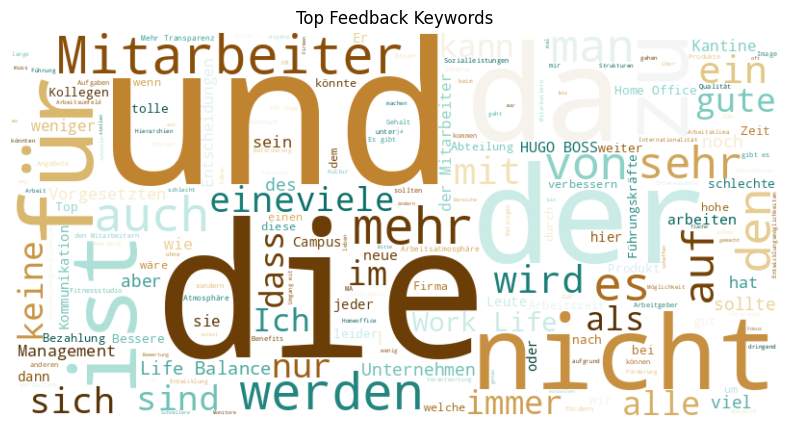

In [39]:
feedback_text = ' '.join(df['feedback_suggestion_text'].dropna().tolist() + 
                         df['feedback_positive_text'].dropna().tolist() + 
                         df['feedback_negative_text'].dropna().tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='BrBG').generate(feedback_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Feedback Keywords')
plt.show()


Look into taking away common words like "und", die, der da etc

In [40]:
df['employment_position_type'].unique()

array(['employee', 'manager', 'Unknown', 'contractor', 'student',
       'freelancer'], dtype=object)

In [41]:
df.dtypes

company_name                            object
review_created_at                       object
review_last_updated_at                  object
review_score                           float64
employer_atmosphere_score              float64
employer_communication_score           float64
employer_teamwork_score                float64
employer_work_life_score               float64
employer_leadership_score              float64
employer_tasks_score                   float64
employer_equality_score                float64
employer_old_colleagues_score          float64
employer_work_conditions_score         float64
employer_environment_score             float64
employer_salary_score                  float64
employer_image_score                   float64
employer_career_score                  float64
employer_atmosphere_score_text          object
employer_communication_score_text       object
employer_teamwork_score_text            object
employer_work_life_score_text           object
employer_lead

In [42]:
score_columns = [
    'review_score',
    'employer_atmosphere_score',
    'employer_communication_score',
    'employer_teamwork_score',
    'employer_work_life_score',
    'employer_leadership_score',
    'employer_tasks_score',
    'employer_equality_score',
    'employer_old_colleagues_score',
    'employer_work_conditions_score',
    'employer_environment_score',
    'employer_salary_score', 
    'employer_image_score', 
    'employer_career_score'
]

In [43]:
#print the index of df2
df2.index


Index(['employment_is_recommended', 'internet', 'stock_options',
       'health_program', 'flex_working_hours', 'parking', 'accessibility',
       'mobile_phone', 'discounts', 'home_office', 'doctor', 'events',
       'cantine', 'dogs', 'car', 'meals', 'pension_plan', 'daycare',
       'reachability', 'coaching'],
      dtype='object')

In [44]:
df_bool_prep = df[['employment_department', 'employment_position_type', 'review_user_gender',
'employment_is_recommended',
 'internet',
 'stock_options',
 'health_program',
 'flex_working_hours',
 'parking',
 'accessibility',
 'mobile_phone',
 'discounts',
 'home_office',
 'doctor',
 'events',
 'cantine',
 'dogs',
 'car',
 'meals',
 'pension_plan',
 'daycare',
 'reachability',
 'coaching']]


### Split by Employee vs Manager

In [45]:
#groupby employment_position_type and take the mean of the review_score
df_employment = df.groupby('employment_position_type')[score_columns].mean().reset_index()
df_employment = df_employment.T

#set the first row as the header
df_employment.columns = df_employment.iloc[0]
df_employment = df_employment[1:]
df_employment


employment_position_type,Unknown,contractor,employee,freelancer,manager,student
review_score,3.794867,4.6154,4.067049,4.7692,4.157177,4.487167
employer_atmosphere_score,3.833333,5.0,4.19171,5.0,4.385965,4.666667
employer_communication_score,3.333333,5.0,3.744792,5.0,3.719298,4.0
employer_teamwork_score,3.5,4.0,4.164948,5.0,4.245614,4.0
employer_work_life_score,3.666667,4.0,4.227979,5.0,4.22807,5.0
employer_leadership_score,3.5,5.0,3.762887,5.0,3.982456,4.333333
employer_tasks_score,3.833333,4.0,4.26943,5.0,4.321429,4.666667
employer_equality_score,4.166667,5.0,4.05291,5.0,4.089286,4.666667
employer_old_colleagues_score,3.833333,5.0,4.241935,5.0,4.321429,4.666667
employer_work_conditions_score,4.0,5.0,4.390625,5.0,4.350877,5.0


In [46]:
print(df_employment.min().min())
print(df_employment.max().max())

3.0
5.0


In [47]:
heatmap_data = df_employment.T.astype(float)

fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns, 
    y=heatmap_data.index,    
    colorscale=px.colors.sequential.Brwnyl, 
    colorbar=dict(title='Score'),
    zmin=df_employment.min().min(), zmax=df_employment.max().max(), 
    hoverongaps=False
))

fig.update_layout(
    title='Heatmap of Benefits Across Employment Positions',
    xaxis_title='Employment Position Type',
    yaxis_title='Benefit',
    xaxis=dict(tickmode='array', tickvals=list(range(len(heatmap_data.columns))), tickangle=-45),
    yaxis=dict(tickmode='array', tickvals=list(range(len(heatmap_data.index)))),
    height=600,
    width=900,
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=14)
)

fig.show()

In [48]:
#for counting boolean values, first we need to know how many people are in each group 
df_employment_bool = df_bool_prep.drop(columns=['employment_department', 'review_user_gender'])
df_employment_bool


,employment_position_type,employment_is_recommended,internet,stock_options,health_program,flex_working_hours,parking,accessibility,mobile_phone,discounts,...,doctor,events,cantine,dogs,car,meals,pension_plan,daycare,reachability,coaching
0,employee,True,True,True,True,True,True,True,True,True,...,True,True,True,<NA>,True,<NA>,True,True,True,True
1,employee,True,<NA>,True,True,<NA>,True,True,<NA>,True,...,True,True,True,<NA>,<NA>,True,True,<NA>,<NA>,True
2,employee,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,<NA>,True
3,employee,True,True,True,True,True,<NA>,True,<NA>,True,...,True,True,True,<NA>,<NA>,<NA>,True,<NA>,<NA>,True
4,employee,True,True,True,True,True,True,True,True,True,...,True,True,True,<NA>,True,<NA>,True,True,<NA>,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,employee,True,True,True,True,True,True,True,True,True,...,True,True,True,<NA>,<NA>,True,True,True,<NA>,<NA>
258,employee,True,<NA>,True,True,True,True,<NA>,<NA>,True,...,True,True,True,<NA>,<NA>,<NA>,True,True,<NA>,True
259,manager,True,True,True,True,True,True,<NA>,True,True,...,True,True,True,<NA>,<NA>,<NA>,True,<NA>,<NA>,True
260,employee,True,True,True,True,True,True,True,True,True,...,True,True,True,<NA>,<NA>,True,True,True,<NA>,True


In [49]:
#count the number of times each employement_position_type appears
group_sizes = df_employment_bool['employment_position_type'].value_counts()
group_sizes
#print(df_employment_bool['employment_position_type'].value_counts())

employment_position_type
employee      194
manager        57
Unknown         6
student         3
contractor      1
freelancer      1
Name: count, dtype: int64

In [50]:
df_employment_bool = df_employment_bool.groupby('employment_position_type').sum().reset_index()
df_employment_bool = df_employment_bool.T

#set the first row as the header
df_employment_bool.columns = df_employment_bool.iloc[0]
df_employment_bool = df_employment_bool[1:]
df_employment_bool

employment_position_type,Unknown,contractor,employee,freelancer,manager,student
employment_is_recommended,4,1,161,1,51,3
internet,2,1,105,1,35,2
stock_options,3,1,129,1,42,1
health_program,3,1,148,1,50,2
flex_working_hours,4,1,156,1,50,2
parking,4,1,138,1,45,1
accessibility,1,1,77,1,21,2
mobile_phone,3,1,96,1,47,0
discounts,5,1,171,1,54,3
home_office,4,1,156,1,49,2


In [51]:
for employment_type in group_sizes.index:
    # Divide the counts by the group size and multiply by 100
    df_employment_bool[employment_type] = (df_employment_bool[employment_type] / group_sizes[employment_type]) * 100

df_employment_bool = df_employment_bool.round(3)


In [52]:
df_employment_bool = df_employment_bool.astype(float).round(3)
df_employment_bool

employment_position_type,Unknown,contractor,employee,freelancer,manager,student
employment_is_recommended,66.667,100.0,82.990,100.0,89.474,100.000
internet,33.333,100.0,54.124,100.0,61.404,66.667
stock_options,50.000,100.0,66.495,100.0,73.684,33.333
health_program,50.000,100.0,76.289,100.0,87.719,66.667
flex_working_hours,66.667,100.0,80.412,100.0,87.719,66.667
parking,66.667,100.0,71.134,100.0,78.947,33.333
accessibility,16.667,100.0,39.691,100.0,36.842,66.667
mobile_phone,50.000,100.0,49.485,100.0,82.456,0.000
discounts,83.333,100.0,88.144,100.0,94.737,100.000
home_office,66.667,100.0,80.412,100.0,85.965,66.667


### Split by Gender


In [53]:
#groupby employment_position_type and take the mean of the review_score
df_gender = df.groupby('review_user_gender')[score_columns].mean().reset_index()
df_gender = df_gender.T

#set the first row as the header
df_gender.columns = df_gender.iloc[0]
df_gender = df_gender[1:]
df_gender


review_user_gender,Unknown,female,male,wont tell
review_score,4.065738,4.433568,4.086645,3.480775
employer_atmosphere_score,4.188406,4.590909,4.392857,3.75
employer_communication_score,3.692683,4.090909,3.827586,3.75
employer_teamwork_score,4.130435,4.636364,4.103448,4.0
employer_work_life_score,4.26087,4.272727,4.071429,3.25
employer_leadership_score,3.792271,4.090909,3.931034,3.0
employer_tasks_score,4.252427,4.636364,4.25,3.75
employer_equality_score,4.019802,4.409091,4.321429,3.5
employer_old_colleagues_score,4.19598,4.818182,4.357143,3.75
employer_work_conditions_score,4.360976,4.772727,4.344828,3.75


In [54]:
heatmap_data = df_gender.T.astype(float)

fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,  
    y=heatmap_data.index,    
    colorscale=px.colors.sequential.Brwnyl,  
    colorbar=dict(title='Score'),
    zmin=df_gender.min().min(), zmax=df_gender.max().max(),  
    hoverongaps=False
))

fig.update_layout(
    title='Heatmap of Benefits Across Genders',
    xaxis_title='Employment Position Type',
    yaxis_title='Benefit',
    xaxis=dict(tickmode='array', tickvals=list(range(len(heatmap_data.columns))), tickangle=-45),
    yaxis=dict(tickmode='array', tickvals=list(range(len(heatmap_data.index)))),
    height=600,
    width=900,
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=14)
)

fig.show()


In [55]:
#for counting boolean values, first we need to know how many people are in each group 
df_gender_bool = df_bool_prep.drop(columns=['employment_department', 'employment_position_type'])
df_gender_bool


,review_user_gender,employment_is_recommended,internet,stock_options,health_program,flex_working_hours,parking,accessibility,mobile_phone,discounts,...,doctor,events,cantine,dogs,car,meals,pension_plan,daycare,reachability,coaching
0,Unknown,True,True,True,True,True,True,True,True,True,...,True,True,True,<NA>,True,<NA>,True,True,True,True
1,Unknown,True,<NA>,True,True,<NA>,True,True,<NA>,True,...,True,True,True,<NA>,<NA>,True,True,<NA>,<NA>,True
2,male,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,<NA>,True
3,Unknown,True,True,True,True,True,<NA>,True,<NA>,True,...,True,True,True,<NA>,<NA>,<NA>,True,<NA>,<NA>,True
4,female,True,True,True,True,True,True,True,True,True,...,True,True,True,<NA>,True,<NA>,True,True,<NA>,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,male,True,True,True,True,True,True,True,True,True,...,True,True,True,<NA>,<NA>,True,True,True,<NA>,<NA>
258,Unknown,True,<NA>,True,True,True,True,<NA>,<NA>,True,...,True,True,True,<NA>,<NA>,<NA>,True,True,<NA>,True
259,Unknown,True,True,True,True,True,True,<NA>,True,True,...,True,True,True,<NA>,<NA>,<NA>,True,<NA>,<NA>,True
260,male,True,True,True,True,True,True,True,True,True,...,True,True,True,<NA>,<NA>,True,True,True,<NA>,True


In [56]:
#count the number of times each review_user_gender appears
group_sizes = df_gender_bool['review_user_gender'].value_counts()
group_sizes


review_user_gender
Unknown      207
male          29
female        22
wont tell      4
Name: count, dtype: int64

In [57]:
df_gender_bool = df_gender_bool.groupby('review_user_gender').sum().reset_index()
df_gender_bool = df_gender_bool.T

#set the first row as the header
df_gender_bool.columns = df_gender_bool.iloc[0]
df_gender_bool = df_gender_bool[1:]
df_gender_bool

review_user_gender,Unknown,female,male,wont tell
employment_is_recommended,172,21,24,4
internet,110,14,21,1
stock_options,138,18,20,1
health_program,165,18,21,1
flex_working_hours,174,17,20,3
parking,149,18,20,3
accessibility,76,14,13,0
mobile_phone,115,13,18,2
discounts,189,19,23,4
home_office,171,18,22,2


In [58]:
for gender in group_sizes.index:
    # Divide the counts by the group size and multiply by 100
    df_gender_bool[gender] = (df_gender_bool[gender] / group_sizes[gender]) * 100

df_gender_bool = df_gender_bool.astype(float).round(3)
df_gender_bool

review_user_gender,Unknown,female,male,wont tell
employment_is_recommended,83.092,95.455,82.759,100.0
internet,53.140,63.636,72.414,25.0
stock_options,66.667,81.818,68.966,25.0
health_program,79.710,81.818,72.414,25.0
flex_working_hours,84.058,77.273,68.966,75.0
parking,71.981,81.818,68.966,75.0
accessibility,36.715,63.636,44.828,0.0
mobile_phone,55.556,59.091,62.069,50.0
discounts,91.304,86.364,79.310,100.0
home_office,82.609,81.818,75.862,50.0


### Split by Department


In [59]:
#groupby employment_position_type and take the mean of the review_score
df_dept = df.groupby('employment_department')[score_columns].mean().reset_index()
df_dept = df_dept.T

df_dept.columns = df_dept.iloc[0]
df_dept = df_dept[1:]
df_dept


employment_department,Unknown,administration,communication,controlling,design,it,legal,logistic,operations,other,procurement,product,recruiting,research,sales
review_score,3.965822,3.791168,4.333333,4.2596,3.652395,4.344548,4.73846,4.079061,3.714286,4.346739,4.390114,4.4945,4.628211,4.126067,3.462968
employer_atmosphere_score,4.222222,3.954545,4.0,4.5,3.809524,4.461538,4.8,4.277778,3.571429,4.666667,4.428571,4.714286,4.611111,4.166667,3.631579
employer_communication_score,3.666667,3.363636,4.333333,3.875,3.238095,4.098039,4.4,3.833333,3.571429,3.878788,3.928571,4.0,4.111111,3.666667,3.210526
employer_teamwork_score,3.777778,4.045455,5.0,4.5,3.818182,4.365385,4.6,4.0,3.428571,4.30303,4.428571,4.571429,4.777778,4.5,3.657895
employer_work_life_score,4.111111,4.0,4.333333,4.5,3.666667,4.538462,5.0,4.0,4.285714,4.454545,4.714286,4.714286,4.777778,4.5,3.421053
employer_leadership_score,3.888889,3.5,4.0,4.25,2.954545,4.269231,4.8,4.0,3.714286,4.090909,3.857143,3.857143,4.388889,3.666667,3.078947
employer_tasks_score,4.444444,3.818182,4.666667,4.5,3.904762,4.5,4.8,4.388889,3.714286,4.484848,4.5,4.714286,4.888889,4.666667,3.594595
employer_equality_score,3.888889,3.55,4.333333,4.625,3.47619,4.32,4.8,4.111111,3.571429,4.333333,4.285714,4.428571,4.666667,4.0,3.621622
employer_old_colleagues_score,3.666667,3.8,4.0,4.5,4.095238,4.48,4.6,4.352941,4.0,4.677419,4.642857,4.428571,4.833333,3.833333,3.648649
employer_work_conditions_score,4.333333,4.045455,4.666667,4.5,4.454545,4.568627,4.6,4.111111,4.142857,4.666667,4.642857,5.0,4.833333,4.333333,3.72973


In [60]:
heatmap_data = df_dept.T.astype(float)

fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,  
    y=heatmap_data.index,    
    colorscale=px.colors.sequential.Brwnyl,  
    colorbar=dict(title='Score'),
    zmin=df_dept.min().min(), zmax=df_dept.max().max(), 
    hoverongaps=False
))

fig.update_layout(
    title='Heatmap of Benefits Across Departments',
    xaxis_title='Employment Position Type',
    yaxis_title='Benefit',
    xaxis=dict(tickmode='array', tickvals=list(range(len(heatmap_data.columns))), tickangle=-45),
    yaxis=dict(tickmode='array', tickvals=list(range(len(heatmap_data.index)))),
    height=600,
    width=900,
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=14)
)

fig.show()


In [61]:
#for counting boolean values, first we need to know how many people are in each group 
df_dept_bool = df_bool_prep.drop(columns=['employment_position_type', 'review_user_gender'])
df_dept_bool


,employment_department,employment_is_recommended,internet,stock_options,health_program,flex_working_hours,parking,accessibility,mobile_phone,discounts,...,doctor,events,cantine,dogs,car,meals,pension_plan,daycare,reachability,coaching
0,administration,True,True,True,True,True,True,True,True,True,...,True,True,True,<NA>,True,<NA>,True,True,True,True
1,operations,True,<NA>,True,True,<NA>,True,True,<NA>,True,...,True,True,True,<NA>,<NA>,True,True,<NA>,<NA>,True
2,it,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,<NA>,True
3,operations,True,True,True,True,True,<NA>,True,<NA>,True,...,True,True,True,<NA>,<NA>,<NA>,True,<NA>,<NA>,True
4,other,True,True,True,True,True,True,True,True,True,...,True,True,True,<NA>,True,<NA>,True,True,<NA>,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,design,True,True,True,True,True,True,True,True,True,...,True,True,True,<NA>,<NA>,True,True,True,<NA>,<NA>
258,sales,True,<NA>,True,True,True,True,<NA>,<NA>,True,...,True,True,True,<NA>,<NA>,<NA>,True,True,<NA>,True
259,other,True,True,True,True,True,True,<NA>,True,True,...,True,True,True,<NA>,<NA>,<NA>,True,<NA>,<NA>,True
260,logistic,True,True,True,True,True,True,True,True,True,...,True,True,True,<NA>,<NA>,True,True,True,<NA>,True


In [62]:
#count the number of times each employement_position_type appears
group_sizes = df_dept_bool['employment_department'].value_counts()
group_sizes
#print(df_employment_bool['employment_position_type'].value_counts())

employment_department
it                52
sales             38
other             33
administration    22
design            22
recruiting        18
logistic          18
procurement       14
Unknown            9
controlling        8
operations         7
product            7
research           6
legal              5
communication      3
Name: count, dtype: int64

In [63]:
df_dept_bool = df_dept_bool.groupby('employment_department').sum().reset_index()
df_dept_bool = df_dept_bool.T

#set the first row as the header
df_dept_bool.columns = df_dept_bool.iloc[0]
df_dept_bool = df_dept_bool[1:]
df_dept_bool

employment_department,Unknown,administration,communication,controlling,design,it,legal,logistic,operations,other,procurement,product,recruiting,research,sales
employment_is_recommended,8,17,2,7,15,48,5,15,6,29,13,7,18,6,25
internet,4,12,2,4,16,32,4,13,5,16,8,3,12,4,11
stock_options,6,13,2,4,16,39,3,16,7,22,11,3,15,3,17
health_program,5,19,3,7,14,43,5,16,6,28,13,6,17,6,17
flex_working_hours,7,20,3,7,17,47,5,12,5,30,13,7,18,5,18
parking,7,16,3,6,18,41,4,14,5,25,13,7,11,5,15
accessibility,0,11,2,6,8,22,1,12,3,12,6,5,9,0,6
mobile_phone,6,15,2,4,16,35,4,6,2,19,6,5,11,1,16
discounts,8,19,3,8,19,46,5,17,7,32,13,7,18,6,27
home_office,8,20,3,8,17,47,5,13,5,29,13,7,18,5,15


In [64]:
for employment_type in group_sizes.index:
    # Divide the counts by the group size and multiply by 100
    df_dept_bool[employment_type] = (df_dept_bool[employment_type] / group_sizes[employment_type]) * 100

df_dept_bool = df_dept_bool.astype(float).round(3)
df_dept_bool

employment_department,Unknown,administration,communication,controlling,design,it,legal,logistic,operations,other,procurement,product,recruiting,research,sales
employment_is_recommended,88.889,77.273,66.667,87.5,68.182,92.308,100.0,83.333,85.714,87.879,92.857,100.000,100.000,100.000,65.789
internet,44.444,54.545,66.667,50.0,72.727,61.538,80.0,72.222,71.429,48.485,57.143,42.857,66.667,66.667,28.947
stock_options,66.667,59.091,66.667,50.0,72.727,75.000,60.0,88.889,100.000,66.667,78.571,42.857,83.333,50.000,44.737
health_program,55.556,86.364,100.000,87.5,63.636,82.692,100.0,88.889,85.714,84.848,92.857,85.714,94.444,100.000,44.737
flex_working_hours,77.778,90.909,100.000,87.5,77.273,90.385,100.0,66.667,71.429,90.909,92.857,100.000,100.000,83.333,47.368
parking,77.778,72.727,100.000,75.0,81.818,78.846,80.0,77.778,71.429,75.758,92.857,100.000,61.111,83.333,39.474
accessibility,0.000,50.000,66.667,75.0,36.364,42.308,20.0,66.667,42.857,36.364,42.857,71.429,50.000,0.000,15.789
mobile_phone,66.667,68.182,66.667,50.0,72.727,67.308,80.0,33.333,28.571,57.576,42.857,71.429,61.111,16.667,42.105
discounts,88.889,86.364,100.000,100.0,86.364,88.462,100.0,94.444,100.000,96.970,92.857,100.000,100.000,100.000,71.053
home_office,88.889,90.909,100.000,100.0,77.273,90.385,100.0,72.222,71.429,87.879,92.857,100.000,100.000,83.333,39.474


# Connection Between Internal and External Sources

Looking at Quantitative Metrics, goal is to compare Kununu's external scores with the internal perception from the Pulse Check and GPTW to identify gaps or alignments.

In [65]:
df_kununu = df[score_columns]
df_kununu

,review_score,employer_atmosphere_score,employer_communication_score,employer_teamwork_score,employer_work_life_score,employer_leadership_score,employer_tasks_score,employer_equality_score,employer_old_colleagues_score,employer_work_conditions_score,employer_environment_score,employer_salary_score,employer_image_score,employer_career_score
0,4.5385,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,2.0,5.0,4.0
1,4.0769,4.0,3.0,4.0,4.0,5.0,4.0,5.0,4.0,4.0,3.0,4.0,5.0,4.0
2,4.8462,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0
3,4.3077,4.0,4.0,4.0,4.0,5.0,4.0,5.0,5.0,4.0,4.0,4.0,5.0,4.0
4,4.6923,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,4.3077,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0
258,4.4615,4.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0
259,5.0000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
260,4.8462,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0


In [66]:
#reading the Value Pulse clean dataset
vpc = pd.read_excel('VPC_cleaned_data.xlsx')
vpc.head()

,Progress,Duration (in seconds),Finished,Distribution Channel,User Language,Values-based working culture,Connected to HUGO BOSS,Informed about HUGO BOSS values,Values lived out across the organisation,Values lived out in the day-to-day business,...,Please feel free to share your ideas how to live out our HUGO BOSS values even more.,Please feel free to share an example when you experienced one of our values being fully lived out.,Please feel free to share your feedback regarding the survey.,Please select the country you are based in - Country,Please select the division you are mainly working for (primary focus) - Division,Which occupational group are you a part of?,Are you currently in a leadership position?,How long have you been working at HUGO BOSS?,How old are you?,Functional Group
0,100,89,True,anonymous,EN,Positive,Positive,Positive,Neutral,Positive,...,NaN,NaN,NaN,Netherlands,Finance,White Collar,Yes,1-3 years,43 - 50,Corporate & Administrative
1,100,167,True,anonymous,DE,Very Positive,Very Positive,Very Positive,Positive,Positive,...,NaN,NaN,NaN,Germany,Strategy,White Collar,No,> 10 years,35 - 42,Corporate & Administrative
2,100,90,True,anonymous,DE,Neutral,Positive,Neutral,Positive,Neutral,...,NaN,NaN,NaN,Germany,IT,White Collar,No,5-10 years,27 - 34,IT & Technical Services
3,100,176,True,anonymous,DE,Positive,Neutral,Very Positive,Negative,Negative,...,NaN,NaN,NaN,Germany,Logistics,White Collar,No,3-5 years,27 - 34,Logistics & Operations
4,100,130,True,anonymous,EN,Positive,Very Positive,Positive,Very Positive,Very Positive,...,NaN,NaN,NaN,Switzerland,Procurement,No answer,No,1-3 years,27 - 34,Logistics & Operations


In [67]:
gptw = pd.read_excel('GPTW_cleaned.xlsx', index_col=0)

#here, i would only need the overall score 
gptw = gptw[['Average']]
gptw = gptw.drop(gptw.index[0:2])

#groupby the index and take the mean
gptw = gptw.groupby(gptw.index).mean()

#add an overall at the bottom
gptw.loc['Overall'] = gptw.mean()
gptw

,Average
Camaraderie/ Community /Collaboration,70.875
Caring,68.5
Communication,67.714286
Compensation/ non-cultural Benefits,55.666667
Engagement,73.375
Equity,81.0
Fairness & Justice,61.0
Innovation,67.5
Leadership Behavior,68.636364
Pride,78.428571


In [68]:
#finding common columns between the two datasets
print(df_kununu.columns)

print(vpc.columns)



Index(['review_score', 'employer_atmosphere_score',
       'employer_communication_score', 'employer_teamwork_score',
       'employer_work_life_score', 'employer_leadership_score',
       'employer_tasks_score', 'employer_equality_score',
       'employer_old_colleagues_score', 'employer_work_conditions_score',
       'employer_environment_score', 'employer_salary_score',
       'employer_image_score', 'employer_career_score'],
      dtype='object')
Index(['Progress', 'Duration (in seconds)', 'Finished', 'Distribution Channel',
       'User Language', 'Values-based working culture',
       'Connected to HUGO BOSS', 'Informed about HUGO BOSS values',
       'Values lived out across the organisation',
       'Values lived out in the day-to-day business',
       'Values positively influence the working atmosphere',
       'Values have a positive influence on your motivation and engagement',
       'Values support you at work', 'Importance of TRUST',
       'TRUST reflected daily', 'Impor

A list of the combinations: 

1) For an overall view: `review_score`, `Connected to HUGO BOSS` and `Overall`
2) `employer_atmosphere_score` and `Values positively influence the working atmosphere`
3) `employer_teamwork_score`, `TEAM MENTALITY reflected daily` and `Camaraderie/ Community /Collaboration`
4) `employer_communication_score` and `Communication`
5) `employer_equality_score` and `Fairness & Justice`
6) `employer_leadership_score` and `Leadership Behavior`
7) `employer_environment_score` and `Resources and Work Environment`
8) `employer_salary_score` and `Compensation/ non-cultural Benefits`

Issues with comparison: 

- The kununu scores are between 1 and 5, the GPTW are between 0-100 and the VPC scores are between 'Very Negative' and 'Very Positive'

First step would be to scale them so they are comparitive


In [69]:
#creating a dataframe with our relevant data

df_kununu2= df_kununu[['review_score', 'employer_atmosphere_score', 'employer_teamwork_score', 'employer_communication_score', 'employer_equality_score', 'employer_leadership_score','employer_environment_score', 'employer_salary_score']]
vpc2 = vpc[['Connected to HUGO BOSS', 'Values positively influence the working atmosphere', 'TEAM MENTALITY reflected daily']]
#taking only rows that are relevant in gptw 
gptw2 = gptw.loc[['Overall', 'Camaraderie/ Community /Collaboration', 'Communication ', 'Fairness & Justice', 'Leadership Behavior ', 'Resources and Work Environment ', 'Compensation/ non-cultural Benefits']]

In [70]:
#drop any NaN values
df_kununu2 = df_kununu2.dropna()
vpc2 = vpc2.dropna()

print(df_kununu2.shape)
print(vpc2.shape)

(252, 8)
(3504, 3)


In [71]:
#scaling all three datasets to be from 0-100
# Step 1: Define a mapping for sentiment strings to a 1-5 scale
sentiment_mapping = {
    'Very Negative': 1,
    'Negative': 2,
    'Neutral': 3,
    'Positive': 4,
    'Very Positive': 5
}

# Apply mapping to the VPC data
vpc2['Connected to HUGO BOSS'] = vpc2['Connected to HUGO BOSS'].map(sentiment_mapping)
vpc2['Values positively influence the working atmosphere'] = vpc2['Values positively influence the working atmosphere'].map(sentiment_mapping)
vpc2['TEAM MENTALITY reflected daily'] = vpc2['TEAM MENTALITY reflected daily'].map(sentiment_mapping)

# Step 2: Scale the data to a 0-100 range
print(vpc2.dtypes)

Connected to HUGO BOSS                                float64
Values positively influence the working atmosphere    float64
TEAM MENTALITY reflected daily                        float64
dtype: object


In [72]:
# Step 2: Convert all float64 columns to percentages (0-100 scale)
vpc2 = vpc2.apply(lambda x: ((x - 1) / 4) * 100 if x.dtype == 'float64' else x)

#repeat for kunuu
df_kununu2 = df_kununu2.apply(lambda x: ((x - 1) / 4) * 100 if x.dtype == 'float64' else x)

#not needed for gptw as it is already scaled 


In [73]:
gptw2

,Average
Overall,69.699626
Camaraderie/ Community /Collaboration,70.875
Communication,67.714286
Fairness & Justice,61.0
Leadership Behavior,68.636364
Resources and Work Environment,74.0
Compensation/ non-cultural Benefits,55.666667


In [74]:
#renaming the columns
vpc2 = vpc2.rename(columns={'Connected to HUGO BOSS': 'Overall', 
                            'Values positively influence the working atmosphere': 'Working Atmosphere', 
                            'TEAM MENTALITY reflected daily': 'Team Mentality/ Teamwork'})
df_kununu2 = df_kununu2.rename(columns={'review_score': 'Overall', 
                                        'employer_atmosphere_score': 'Working Atmosphere', 
                                        'employer_teamwork_score': 'Team Mentality/ Teamwork',
                                        'employer_communication_score': 'Communication',
                                        'employer_equality_score': 'Fairness & Justice',
                                        'employer_leadership_score' : 'Leadership Behavior',
                                        'employer_environment_score': 'Work Environment',
                                        'employer_salary_score': 'Compensation'
                                        })

#rename the index in gptw
gptw2 = gptw2.rename(index={
                            'Camaraderie/ Community /Collaboration': 'Team Mentality/ Teamwork', 
                            'Communication ': 'Communication',
                            'Leadership Behavior ': 'Leadership Behavior',
                            'Resources and Work Environment ': 'Work Environment',
                            'Compensation/ non-cultural Benefits': 'Compensation'
                            })

In [75]:
#taking the means of all the columns 
vpc_mean = vpc2.mean()
kununu_mean = df_kununu2.mean()

#combine the two 
combined = pd.concat([vpc_mean, kununu_mean, gptw2], axis=1)
combined.columns = ['Value Pulse', 'Kununu', 'Great Place to Work']
combined

,Value Pulse,Kununu,Great Place to Work
Overall,77.948944,77.831865,69.699626
Working Atmosphere,63.328358,81.349206,NaN
Team Mentality/ Teamwork,69.305785,79.662698,70.875
Communication,NaN,68.650794,67.714286
Fairness & Justice,NaN,77.579365,61.0
Leadership Behavior,NaN,71.130952,68.636364
Work Environment,NaN,77.777778,74.0
Compensation,NaN,68.353175,55.666667


In [76]:
# Reshape the DataFrame to a long format
combined['Metric'] = combined.index
df_long = combined.melt(id_vars='Metric', value_vars=['Value Pulse', 'Kununu', 'Great Place to Work'], 
                  var_name='Survey Name', value_name='Score')

# Pick colors from the opposite ends of the Brwnyl color scale
custom_colors = [px.colors.sequential.Brwnyl[5],px.colors.sequential.Brwnyl[0], px.colors.sequential.Brwnyl[3]]


fig = px.scatter(df_long, x='Metric', y='Score', color='Survey Name',
                 title='Scatter Plot of Scores by Survey',
                 labels={'Score': 'Score', 'Metric': 'Metric'},
                 hover_name='Metric',
                 color_discrete_sequence=custom_colors)


fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    width=1000, height=600,
    font=dict(family='Avenir', size=16, color='black')
)

fig.update_traces(marker=dict(size=15))  

fig.show()
